In [100]:
%reset -f
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
from CTR import *
from CTR.PIticks import PIticks

import sys
sys.path.append('../')
from DFT import DFT 

In [101]:
Sr = Atom(32)
Ti = Atom(22)
O  = Atom(8)
Ru = Atom(44)
Nd = Atom(60)
Ni = Atom(28)
Ga = Atom(31)
Y  = Atom(39)
Al = Atom(13)
W  = Atom(74)
La = Atom(57)
Yb = Atom(70)

---
# Xray

In [102]:
XRD = Xray(Nq=2000)
XRD.Q(0,0,1)

array([[-0.        , -0.        , -8.15680294],
       [-0.        , -0.        , -8.14864206],
       [-0.        , -0.        , -8.14048118],
       ...,
       [ 0.        ,  0.        ,  8.14048118],
       [ 0.        ,  0.        ,  8.14864206],
       [ 0.        ,  0.        ,  8.15680294]])

---

# STO SRO

- #1 STO

In [103]:
sto = Perovskite(
    abc = 3.905 * vec(1, 1, 1),
    ABO = (Sr, Ti, O)
)

sro = Perovskite(
	abc = Molecule.pseudocubic(5.567, 5.5304, 7.8446),
    ABO = (Sr, Ru, O)
)

nno = Perovskite(
	abc = Molecule.pseudocubic(5.387, 5.383, 7.610),
    ABO = (Nd, Ni, O)
)

In [104]:
SRO = Film(sro/sto(0,0,1), (1,1,1))
NNO = Film(nno/sto(0,0,1), (1,1,1))
STO = Film(sto, (1,1,inf))

---

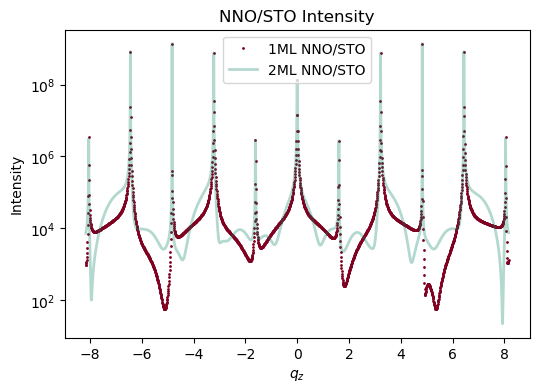

In [105]:
# XRD = Xray(Nq=30000)
# XRD.Q(0,0,1)
plt.figure(figsize=(6,4))

plt.semilogy(XRD.Qz, XRD.I(NNO/STO(0,0,1)), label='1ML NNO/STO', color='#800020', marker='o', markersize=1, linewidth=0)
plt.semilogy(XRD.Qz, XRD.I(NNO/NNO/STO(0,0,1)), color='#008060', linewidth=2, alpha=0.3, label='2ML NNO/STO')

plt.legend()
plt.title("NNO/STO Intensity")
plt.ylabel("Intensity")
plt.xlabel("$q_z$")
plt.legend()

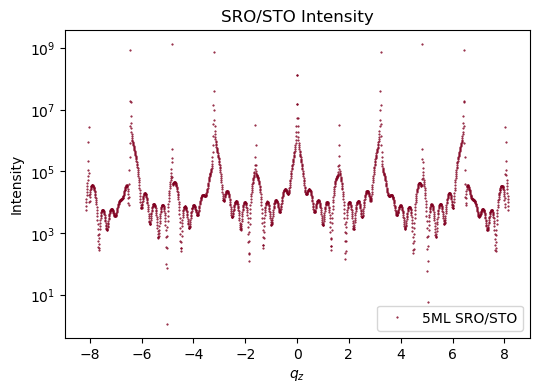

In [106]:
# XRD = Xray(Nq=30000)
# XRD.Q(0,0,1)
plt.figure(figsize=(6,4))

# Sample Intensity
# plt.semilogy(XRD.Qz, XRD.I(SRO/STO(0,0,1)), color='#006080', label='1ML SRO/STO')
# plt.semilogy(XRD.Qz, XRD.I(SRO/SRO/STO(0,0,1)), color='#008060', label='2ML SRO/STO')
plt.semilogy(XRD.Qz, XRD.I(SRO/SRO/SRO/SRO/SRO/STO(0,0,1)), label='5ML SRO/STO', color='#800020', marker='o', markersize=.5, linewidth=0)

plt.legend()
plt.title("SRO/STO Intensity")
plt.ylabel("Intensity")
plt.xlabel("$q_z$")
plt.legend()

---
# Structure Factor

(-150.0, 450.0)

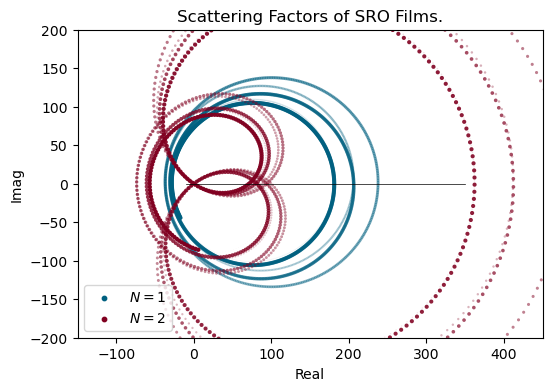

In [190]:
Gen_SRO = lambda N: Film(sro/sto(0,0,1), (1,1,N))

ALPHA = np.linspace(0, 1, len(XRD.Qx)+1)[1:]
SIZE = 10 * ALPHA

plt.figure(figsize=(6,4))
plt.scatter(np.real(XRD.F(Gen_SRO(1))), np.imag(XRD.F(Gen_SRO(1))), marker='o', s=SIZE, linewidth=0, label='$N=1$', color='#006080', alpha=ALPHA)
plt.scatter(np.real(XRD.F(Gen_SRO(2))), np.imag(XRD.F(Gen_SRO(2))), marker='o', s=SIZE, linewidth=0, label='$N=2$', color='#800020', alpha=ALPHA)
# plt.scatter(np.real(XRD.F(Gen_SRO(3))), np.imag(XRD.F(Gen_SRO(3))), marker='o', s=SIZE, linewidth=0, label='$N=3$', color='#008060', alpha=ALPHA)

plt.plot([-10, 350],[0,0], color='black', linewidth=.5)
fake_legend_1 = plt.scatter([], [], marker='o', color='#006080', s=10, label='$N=1$')
fake_legend_2 = plt.scatter([], [], marker='o', color='#800020', s=10, label='$N=2$')
# fake_legend_3 = plt.scatter([], [], marker='o', color='#008060', s=10, label='$N=3$')

plt.legend(handles=[fake_legend_1, fake_legend_2], loc='best', scatterpoints=1, markerscale=1)
plt.title("Scattering Factors of SRO Films.")
plt.ylabel("Imag")
plt.xlabel("Real")
plt.ylim([-200, 200])
plt.xlim([-150, 450])
# plt.grid()

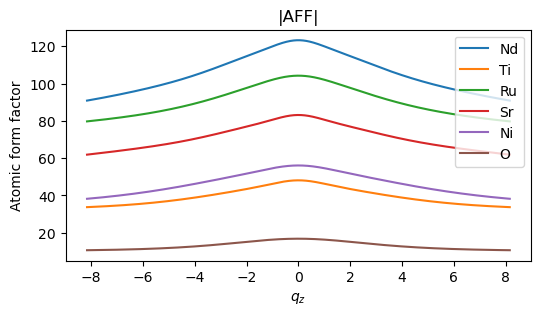

In [160]:
plt.figure(figsize=(6,3))
plt.plot(XRD.Qz, np.abs(Nd.aff(XRD.q, XRD.Energy)), label='Nd')
plt.plot(XRD.Qz, np.abs(Ti.aff(XRD.q, XRD.Energy)), label='Ti')
plt.plot(XRD.Qz, np.abs(Ru.aff(XRD.q, XRD.Energy)), label='Ru')
plt.plot(XRD.Qz, np.abs(Sr.aff(XRD.q, XRD.Energy)), label='Sr')
plt.plot(XRD.Qz, np.abs(Ni.aff(XRD.q, XRD.Energy)), label='Ni')
plt.plot(XRD.Qz, np.abs(O.aff(XRD.q, XRD.Energy)), label='O')
plt.xlabel("$q_z$")
plt.ylabel("Atomic form factor")
plt.title("|AFF|")
plt.legend()

(0.0, 300.0)

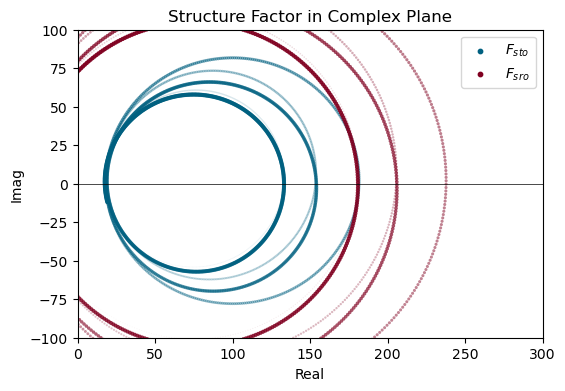

In [162]:
ALPHA = np.linspace(0, 1, len(XRD.Qx)+1)[1:]
SIZE = 10 * ALPHA

plt.figure(figsize=(6,4))
plt.scatter(np.real(XRD.SF(sto)), np.imag(XRD.SF(sto)), marker='o', s=SIZE, linewidth=0, label='$F_{sto}$', color='#006080', alpha=ALPHA)
plt.scatter(np.real(XRD.SF(sro)), np.imag(XRD.SF(sro)), marker='o', s=SIZE, linewidth=0, label='$F_{sro}$', color='#800020', alpha=ALPHA)

plt.plot([-10, 350],[0,0], color='black', linewidth=.5)
fake_legend_sto = plt.scatter([], [], marker='o', color='#006080', s=10, label='$F_{sto}$')
fake_legend_sro = plt.scatter([], [], marker='o', color='#800020', s=10, label='$F_{sro}$')
plt.legend(handles=[fake_legend_sto, fake_legend_sro], loc='best', scatterpoints=1, markerscale=1)
plt.title("Structure Factor in Complex Plane")
plt.ylabel("Imag")
plt.xlabel("Real")
plt.ylim([-100, 100])
plt.xlim([0, 300])
# plt.grid()